In [1]:
import gym
import w_mac
import numpy as np
from gym.spaces import Tuple, Discrete, Box, MultiDiscrete, MultiBinary
import networkx as nx
import random
from w_mac.envs.packet import Packet

{1: [], 2: [], 3: [], 4: [], 5: []}
1 3
2 1
3 2
4 3
5 4


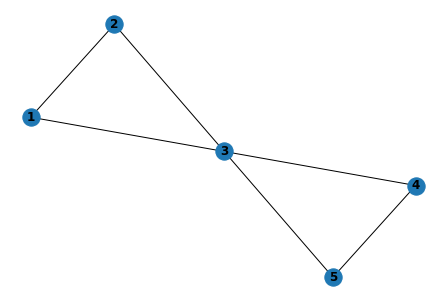

In [2]:
env = gym.make('wmac-v0')

In [3]:
queues = {i: [] for i in env.graph.nodes(data=False)}
print(queues)

for i in env.graph.nodes(data=False):
    #Assumption : same destination for all the queued packets in the node
    src = i
    dest = random.randrange(1,5)
    while (False == (env.graph.has_edge(src,dest))):
        dest = random.randrange(1,5)
    print(src,dest)

    for count in range(2):
        # create packet and register process
        packet = Packet(src,dest,dest) #for now consider single hop. Hence dest = nxt_hop
        queues[src].insert(0, packet)

# Print the number of elements in queue.
#print(len(queues[1]))

n3_queue = queues[3]
n3_first_packet = n3_queue[len(n3_queue)-1]
print('n3_nxt_hop', n3_first_packet.nxt_hop)

#Frame the state - Next hop of all first packets in queue.

state = [] #empty list for state

for node in queues.values():
    if len(node):
        print(node[len(node)-1].id)
        state.append(node[len(node)-1].nxt_hop)
    #for packet in node:
    while (len(node)):
        packet = node.pop()
        print('id :',packet.id)
        print('src :',packet.src)
        print('dest :',packet.dest)
        print('nxt_hop :',packet.nxt_hop)
        print('------------------------')
    
    print(state)


{1: [], 2: [], 3: [], 4: [], 5: []}
1 2
2 1
3 2
4 3
5 4
n3_nxt_hop 2
608472
id : 608472
src : 1
dest : 2
nxt_hop : 2
------------------------
id : 169119
src : 1
dest : 2
nxt_hop : 2
------------------------
[2]
219514
id : 219514
src : 2
dest : 1
nxt_hop : 1
------------------------
id : 292976
src : 2
dest : 1
nxt_hop : 1
------------------------
[2, 1]
354117
id : 354117
src : 3
dest : 2
nxt_hop : 2
------------------------
id : 453202
src : 3
dest : 2
nxt_hop : 2
------------------------
[2, 1, 2]
428973
id : 428973
src : 4
dest : 3
nxt_hop : 3
------------------------
id : 187148
src : 4
dest : 3
nxt_hop : 3
------------------------
[2, 1, 2, 3]
108836
id : 108836
src : 5
dest : 4
nxt_hop : 4
------------------------
id : 697993
src : 5
dest : 4
nxt_hop : 4
------------------------
[2, 1, 2, 3, 4]


In [4]:
actions= env.action_space.sample()
nxt_state, reward, done, _ = env.step(actions)
print(nxt_state, reward, done, _ )

received action [1 0 0 1 0]
next hop [3, 1, 2, 3, 4]
[3, 1, 2, 3, 4] -200 False 0


In [8]:
env.action_space.nvec[2]

2